In [1]:
from hossam import load_data

from matplotlib import pyplot as plt
from matplotlib import font_manager as fm
import seaborn as sb
import numpy as np
from math import sqrt 

from scipy.stats import t, ttest_1samp, normaltest

In [2]:
my_dpi = 200
fpath = "./NotoSansKR-Regular.ttf"
fprop = fm.FontProperties(fname=fpath)
fname = fprop.get_name()


plt.rcParams['font.family'] = fname
plt.rcParams['font.size'] = 6
plt.rcParams['axes.unicode_minus'] = False


📘강아지 체온 변화

In [3]:
origin = load_data('dog_temperature')

print("\n===== 데이터 크기 확인 =====")
print(f"데이터셋 크기:{origin.shape[1]}")
print(f"행 개수:{origin.shape[1]}")

print("\n===== 타입확인 =====")
print(origin.info())

origin.head()

[data] https://data.hossam.kr/data/lab10/dog_temperature.xlsx
[desc] 강아지 25마리의 체온을 측정한 데이터 (출처: 방송통신대학교 통계학개론)
[!] Cannot read metadata

===== 데이터 크기 확인 =====
데이터셋 크기:1
행 개수:1

===== 타입확인 =====
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   체온      25 non-null     float64
dtypes: float64(1)
memory usage: 332.0 bytes
None


,체온
0,25.8
1,24.6
2,26.1
3,22.9
4,25.1


📝신뢰구간 확인

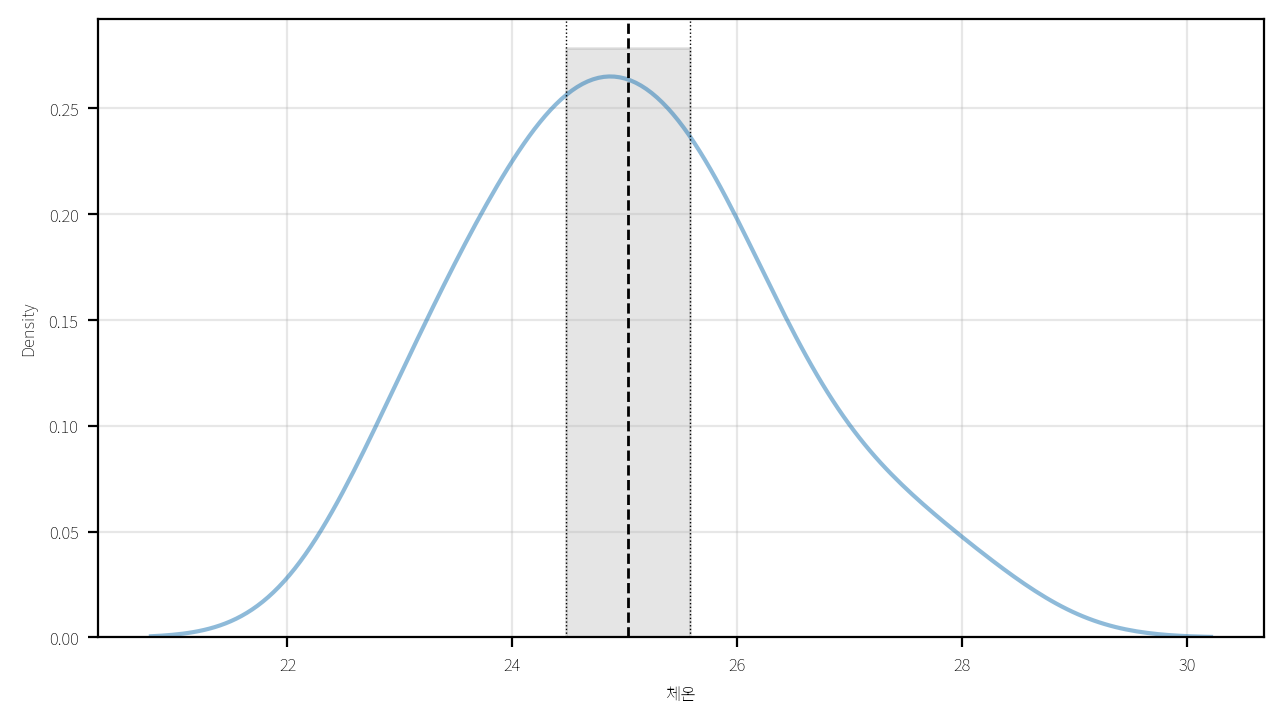

In [6]:
data = origin['체온']
max = data.max()
clevel = 0.95
dof = len(data)-1
sp_mean = data.mean()
sp_std = data.std(ddof=1)
sp_std_error = sp_std/sqrt(len(data))

cmin, cmax = t.interval(clevel, dof, loc=sp_mean, scale=sp_std_error)

width_px = 1280
height_px = 720
rows = 1
cols=1
figsize = (width_px /my_dpi, height_px/my_dpi)
fig, ax = plt.subplots(rows,cols,figsize=figsize, dpi=my_dpi)

# 그래프 그리기->seaborn 사용
sb.kdeplot(data=data, fill=False, alpha = 0.5)
           

ax.axvline(cmin, linestyle=':', color='#000000', linewidth=0.5)
ax.axvline(cmax, linestyle=':', color='#000000',linewidth=0.5)


ymin, ymax = ax.get_ylim()
ax.fill_between([cmin, cmax],0,ymax,alpha=0.1, color='#000000')
ax.axvline(sp_mean, linestyle='--', linewidth=1, color='#000000')


ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()
plt.close()

📝데이터의 정규성 검정

In [11]:
s, p = normaltest(origin['체온'])
"statistic: {0:.3f}, p-value:{1:.3f}, 정규성 충족 여부: {2}".format(s, p,p > 0.05)

'statistic: 0.819, p-value:0.664, 정규성 충족 여부: True'

📝강아지의 평균 체온이 이전에 알려져 있던 24.3과 달라졌는지 여부

In [12]:
s, p = ttest_1samp(origin['체온'], 24.3)
"statistic:{0:.3f}, p-value:{1:.3f}, {2}가설 채택".format(s,p,"대립" if p <= 0.05 else "귀무")

'statistic:2.713, p-value:0.012, 대립가설 채택'

📝강아지의 평균 체온이 과거의 자료인 24.3보다 작아졌는지 알고자 하는 경우

In [13]:
s, p = ttest_1samp(origin['체온'], 24.3, alternative='less')
"statistic:{0:.3f}, p-value:{1:.3f}, {2}가설채택".format(s,p, "대립" if p<=0.05 else "귀무")

'statistic:2.713, p-value:0.994, 귀무가설채택'

📝강아지의 평균 체온이 과거의 자료인 24.3보다 커졌는지 알고자 하는 경우

In [14]:
s, p = ttest_1samp(origin['체온'], 24.3, alternative = 'greater')
"statistic: {0:.3f}, p-value:{1:.3f}, {2}가설 채택".format(s,p,"대립" if p <= 0.05 else "귀무") 

'statistic: 2.713, p-value:0.006, 대립가설 채택'

📘생명보험 가입 금액 평균 비교

In [15]:
origin = load_data("insur")
origin.head()

[data] https://data.hossam.kr/data/lab10/insur.xlsx
[desc] 어느 보험회사에서 한해 동안 모집한 가입원들에 대한 가입 정보 (출처: 방송통신대학교 통계학개론)

field     description
--------  ------------------------------------------------------
직업      1=육체노동, 2=정신노동(직상인), 3=자영업
교육수준  1=초등학교 이하, 2=중졸 및 고졸, 3=대졸, 4=대학원 졸업
성별      1=남자, 2=여자
나이      숫자
가입금액  단위=천만원
월수입    단위=만원



,직업,교육수준,성별,나이,가입금액,월수입
0,1,2,1,35,15.0,100
1,2,3,1,40,10.0,150
2,2,3,2,36,8.0,120
3,3,4,2,38,12.0,140
4,1,1,1,45,10.0,150


📝신뢰구간 확인

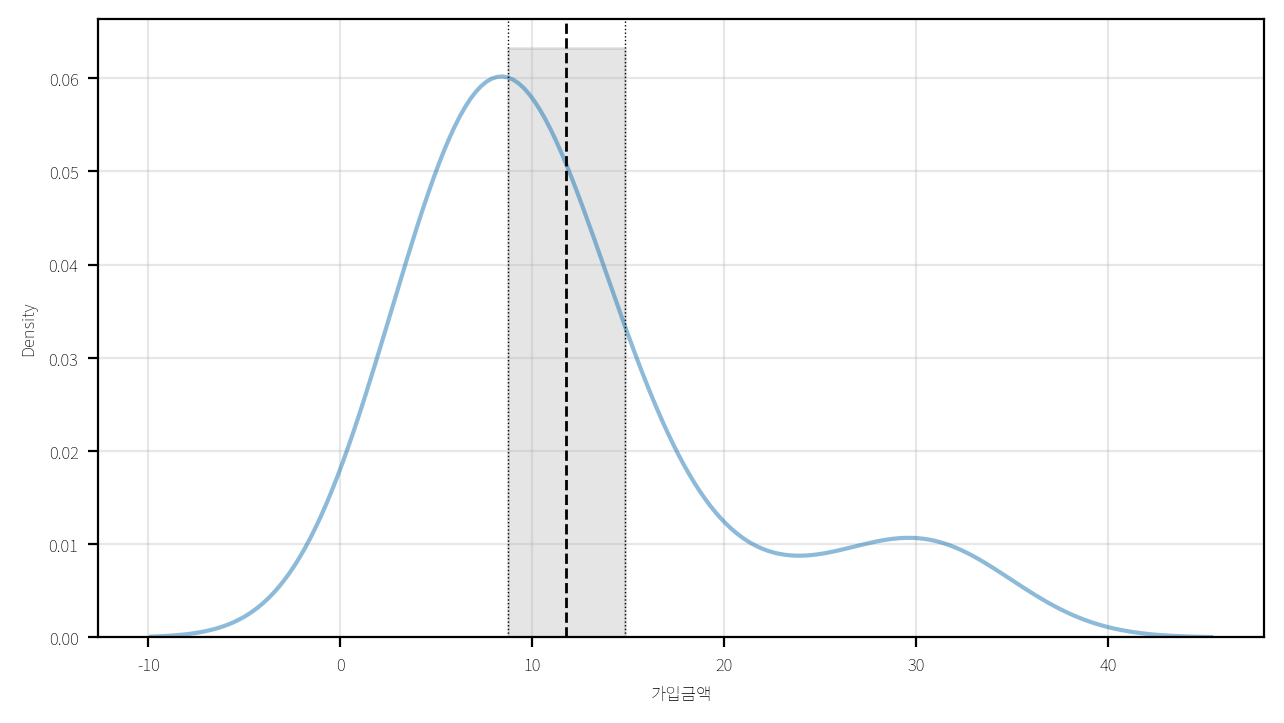

In [17]:
data = origin['가입금액']
max = data.max()
clevel - 0.95
dof = len(data) - 1
sp_mean = data.mean()
sp_std = data.std(ddof=1)
sp_std_error = sp_std/sqrt(len(data))

cmin, cmax = t.interval(clevel, dof, loc=sp_mean, scale=sp_std_error)

width_px = 1280
height_px = 720
rows = 1
cols=1
figsize = (width_px /my_dpi, height_px/my_dpi)
fig, ax = plt.subplots(rows,cols,figsize=figsize, dpi=my_dpi)

# 그래프 그리기->seaborn 사용
sb.kdeplot(data=data, fill=False, alpha = 0.5)
           

ax.axvline(cmin, linestyle=':', color='#000000', linewidth=0.5)
ax.axvline(cmax, linestyle=':', color='#000000',linewidth=0.5)


ymin, ymax = ax.get_ylim()
ax.fill_between([cmin, cmax],0,ymax,alpha=0.1, color='#000000')
ax.axvline(sp_mean, linestyle='--', linewidth=1, color='#000000')


ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()
plt.close()


📝데이터의 정규성 검정

In [18]:
s, p = normaltest(origin['가입금액'])
"statistic:{0:.3f}, p-value:{1:.3f}, 정규성 충족 여부: {2}".format(s,p,p > 0.05)

'statistic:11.438, p-value:0.003, 정규성 충족 여부: False'

📝데이터의 로그 변환

In [21]:
log_data = np.log(origin['가입금액'])
log_data

0     2.708050
1     2.302585
2     2.079442
3     2.484907
4     2.302585
5     0.916291
6     2.197225
7     2.014903
8     1.704748
9     3.218876
10    2.351375
11    1.252763
12    2.272126
13    2.525729
14    3.401197
15    2.397895
16    2.174752
17    1.504077
18    2.054124
19    1.902108
20    1.945910
21    3.496508
22    2.708050
23    2.995732
24    1.386294
25    1.609438
26    2.708050
27    3.401197
28    1.609438
29    2.302585
Name: 가입금액, dtype: float64

In [22]:
target_value = np.log(10)
target_value

np.float64(2.302585092994046)

In [23]:
# 결과에 대한 정규성 검정
s, p = normaltest(log_data)
"statistic:{0:.3f}, p-value:{1:.3f}, 정규성 충족:{2}".format(s,p,p > 0.05)

'statistic:0.104, p-value:0.950, 정규성 충족:True'

📝가입금액의 평균이 1억원과 같은지, 다른지 여부

In [24]:
s, p = ttest_1samp(log_data, target_value)
"statistic:{0:.3f}, p-value:{1:.3f}, {2}가설 채택".format(s,p,"대립" if p <= 0.05 else "귀무")

'statistic:-0.326, p-value:0.747, 귀무가설 채택'

📝가입금액의 평균이 1억원보다 작은지 여부

In [26]:
s, p = ttest_1samp(log_data,  target_value, alternative = 'less')
"statistic:{0:.3f}, p-value:{1:.3f}, {2}가설채택".format(s,p,"대립" if p <= 0.05 else "귀무")

'statistic:-0.326, p-value:0.374, 귀무가설채택'

📝가입금액의 평균이 1억원보다 큰지 여부

In [27]:
s, p = ttest_1samp(log_data, target_value, alternative = 'greater')
"statistic: {0:.3f}, p-value: {1:.3f}, {2}가설채택".format(s,p, "대립" if p <0.05 else "귀무")

'statistic: -0.326, p-value: 0.626, 귀무가설채택'